# Projeto - Machine Learning I

**Grupo 3**<br>
*Paulo Lamb*<br>
*Fabrício*<br>
*Fernando Henrique Maia Mendes*<br>
*Michelle*<br>
*Eric*<br>

**Dataset:**<br>
https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data<br>
<hr>

# Breast Cancer Wisconsin (Diagnostic) Dataset

In [1]:
# IMPORTAÇÃO DAS BIBLIOTECAS

import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import shap


import warnings
warnings.filterwarnings("ignore")

In [2]:
# CARREGAMENTO DOS DADOS
dados = pd.read_csv('data/breast-cancer.csv', header=(0))
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## descrição das features

| Coluna | Descrição | 
|--------|--------|
|  id   |  Identificador único do paciente   |
|  diagnosis   |  Diagnóstico: $M$ (maligno) ou $B$ (benigno)   |
|  radius_mean   |  Média do raio das células   |
|  texture_mean   |  Média da textura (variação na intensidade de pixel)   |
|  perimeter_mean   |  Média do perímetro   |
|  area_mean   |  Média da área   |
|  smoothness_mean   |  Média da suavidade (variação local)   |
|  compactness_mean   |  Média da compacidade (perímetro² / área - 1.0)   |
|  concavity_mean   |  Média da concavidade (profundidade das cavidades)   |
|  concave_points_mean   |  Média dos pontos côncavos nas bordas   |
|  simetry_mean   |  Média da simetria  |
|  fractal_dimension_mean   |  Média da dimensão fractal (complexidade da borda)  |
|  radius_se   |  Erro padrão do raio   |
|  texture_se   |  Erro padrão da textura   |
|  perimeter_se   |  Erro padrão do perímetro   |
|  area_se   |  Erro padrão da área   |
|  smoothness_se   |  Erro padrão da suavidade   |
|  compactness_se   |  Erro padrão da compacidade   |
|  concavity_se   |  Erro padrão da concavidade   |
|  concave points_se   |  Erro padrão dos pontos côncavos   |
|  simetry_se   |  Erro padrão da simetria   |
|  fractal_dimension_se   |  Erro padrão da dimensão fractal  |
|  radius_worst   |  Maior valor de raio observado   |
|  texture_worst   |  Maior valor de textura observado   |
|  perimeter_worst   |  Maior valor de perímetro observado   |
|  area_worst   |  Maior valor de área observado   |
|  smoothness_worst   |  Maior valor de suavidade observado   |
|  compactness_worst   |  Maior valor de compacidade observado   |
|  concavity_worst   |  Maior valor de concavidade observado padrão da simetria   |
|  concave_points_worst   |  Maior valor de pontos côncavos observado   |
|  simetry_worst   |  Maior valor de simetria observado   |
|  fractal_dimension_worst   |  Maior valor de dimensão fractal observado   |


In [3]:
# EXCLUSÃO DE COLUNAS DESNECESSÁRIAS
dados.drop(columns=['id'], axis=1, inplace=True)

dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# VERIFICANDO VALORES NULOS
dados.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# BALANCEAMENTO DOS DADOS
print("Número de linhas e colunas no conjunto de dados:", dados.shape)
print("Número de valores únicos na coluna 'diagnosis':", dados['diagnosis'].nunique())
print("Contagem de valores na coluna 'diagnosis':")
print(dados['diagnosis'].value_counts())
print(" ")
print("Em Percentual:")
print(dados['diagnosis'].value_counts(normalize=True)*100)

Número de linhas e colunas no conjunto de dados: (569, 31)
Número de valores únicos na coluna 'diagnosis': 2
Contagem de valores na coluna 'diagnosis':
diagnosis
B    357
M    212
Name: count, dtype: int64
 
Em Percentual:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


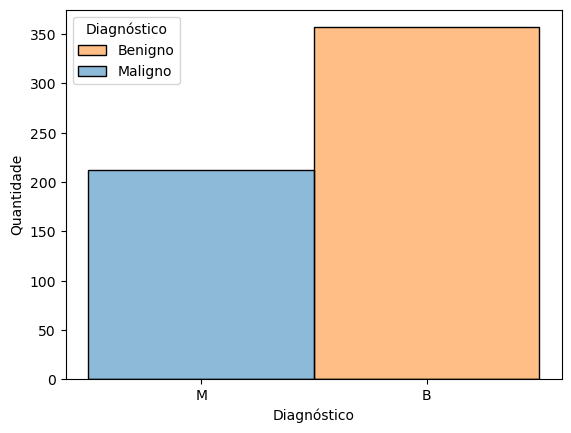

In [6]:
# BALANCEAMENTO DOS DADOS - HISTOGRAMA
sns.histplot(data=dados, x='diagnosis', hue='diagnosis', legend=True)
plt.legend(title ='Diagnóstico', labels=['Benigno','Maligno'])
plt.xlabel('Diagnóstico')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
# CORRELAÇÃO - PAIRPLOT

sns.pairplot(dados, hue='diagnosis') # coluna diagnosis_M é bolean (True/False)
plt.suptitle('Pairplot dos Dados de Câncer de Mama', y=1.02)
plt.show()

### Notem que está bastante confuso. Alta quantidade de features

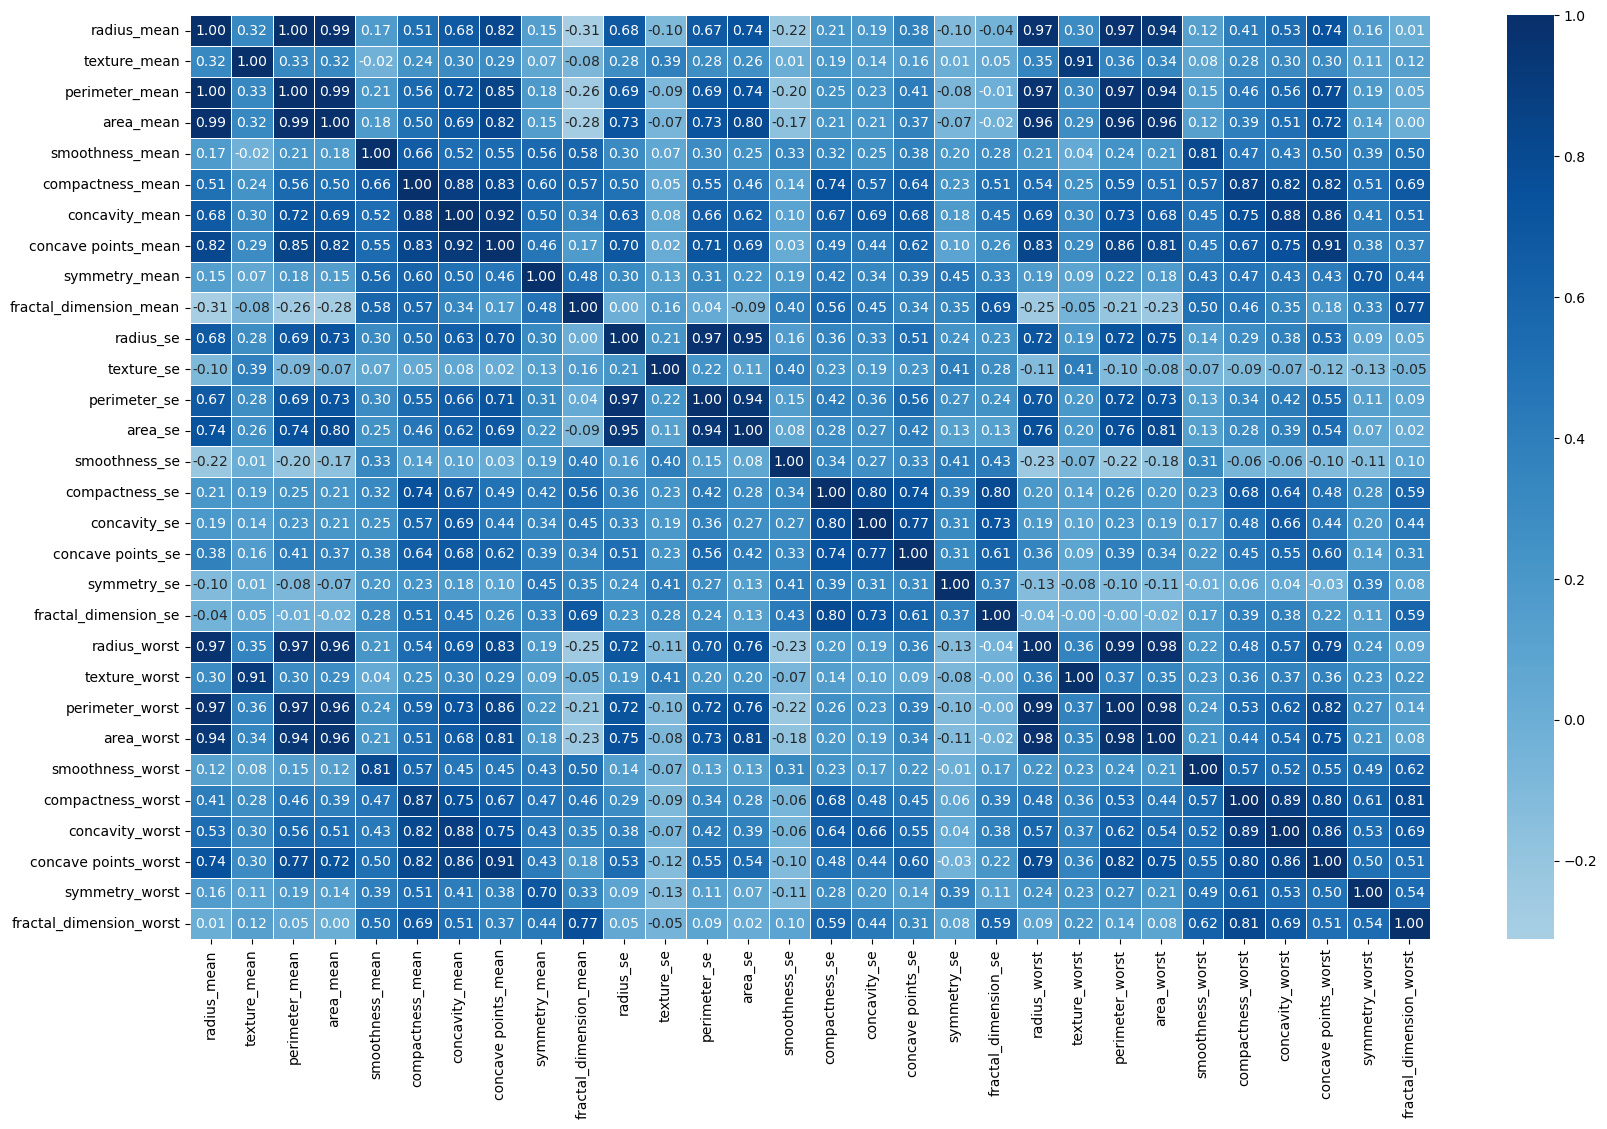

In [7]:
# ANÁLISE DE CORRELAÇÃO - HEATMAP
plt.figure(figsize=(20, 12))
sns.heatmap(dados.drop(columns=['diagnosis']).corr(), annot=True, fmt=".2f", center=0, cmap='Blues', linewidths=0.5)
plt.show()

### A matriz de correlação acima indica que há diversas variáveis com correlação forte e portanto redundantes.

#### Antes de tratar isto, vamos verificar alguns histogramas e boxplots

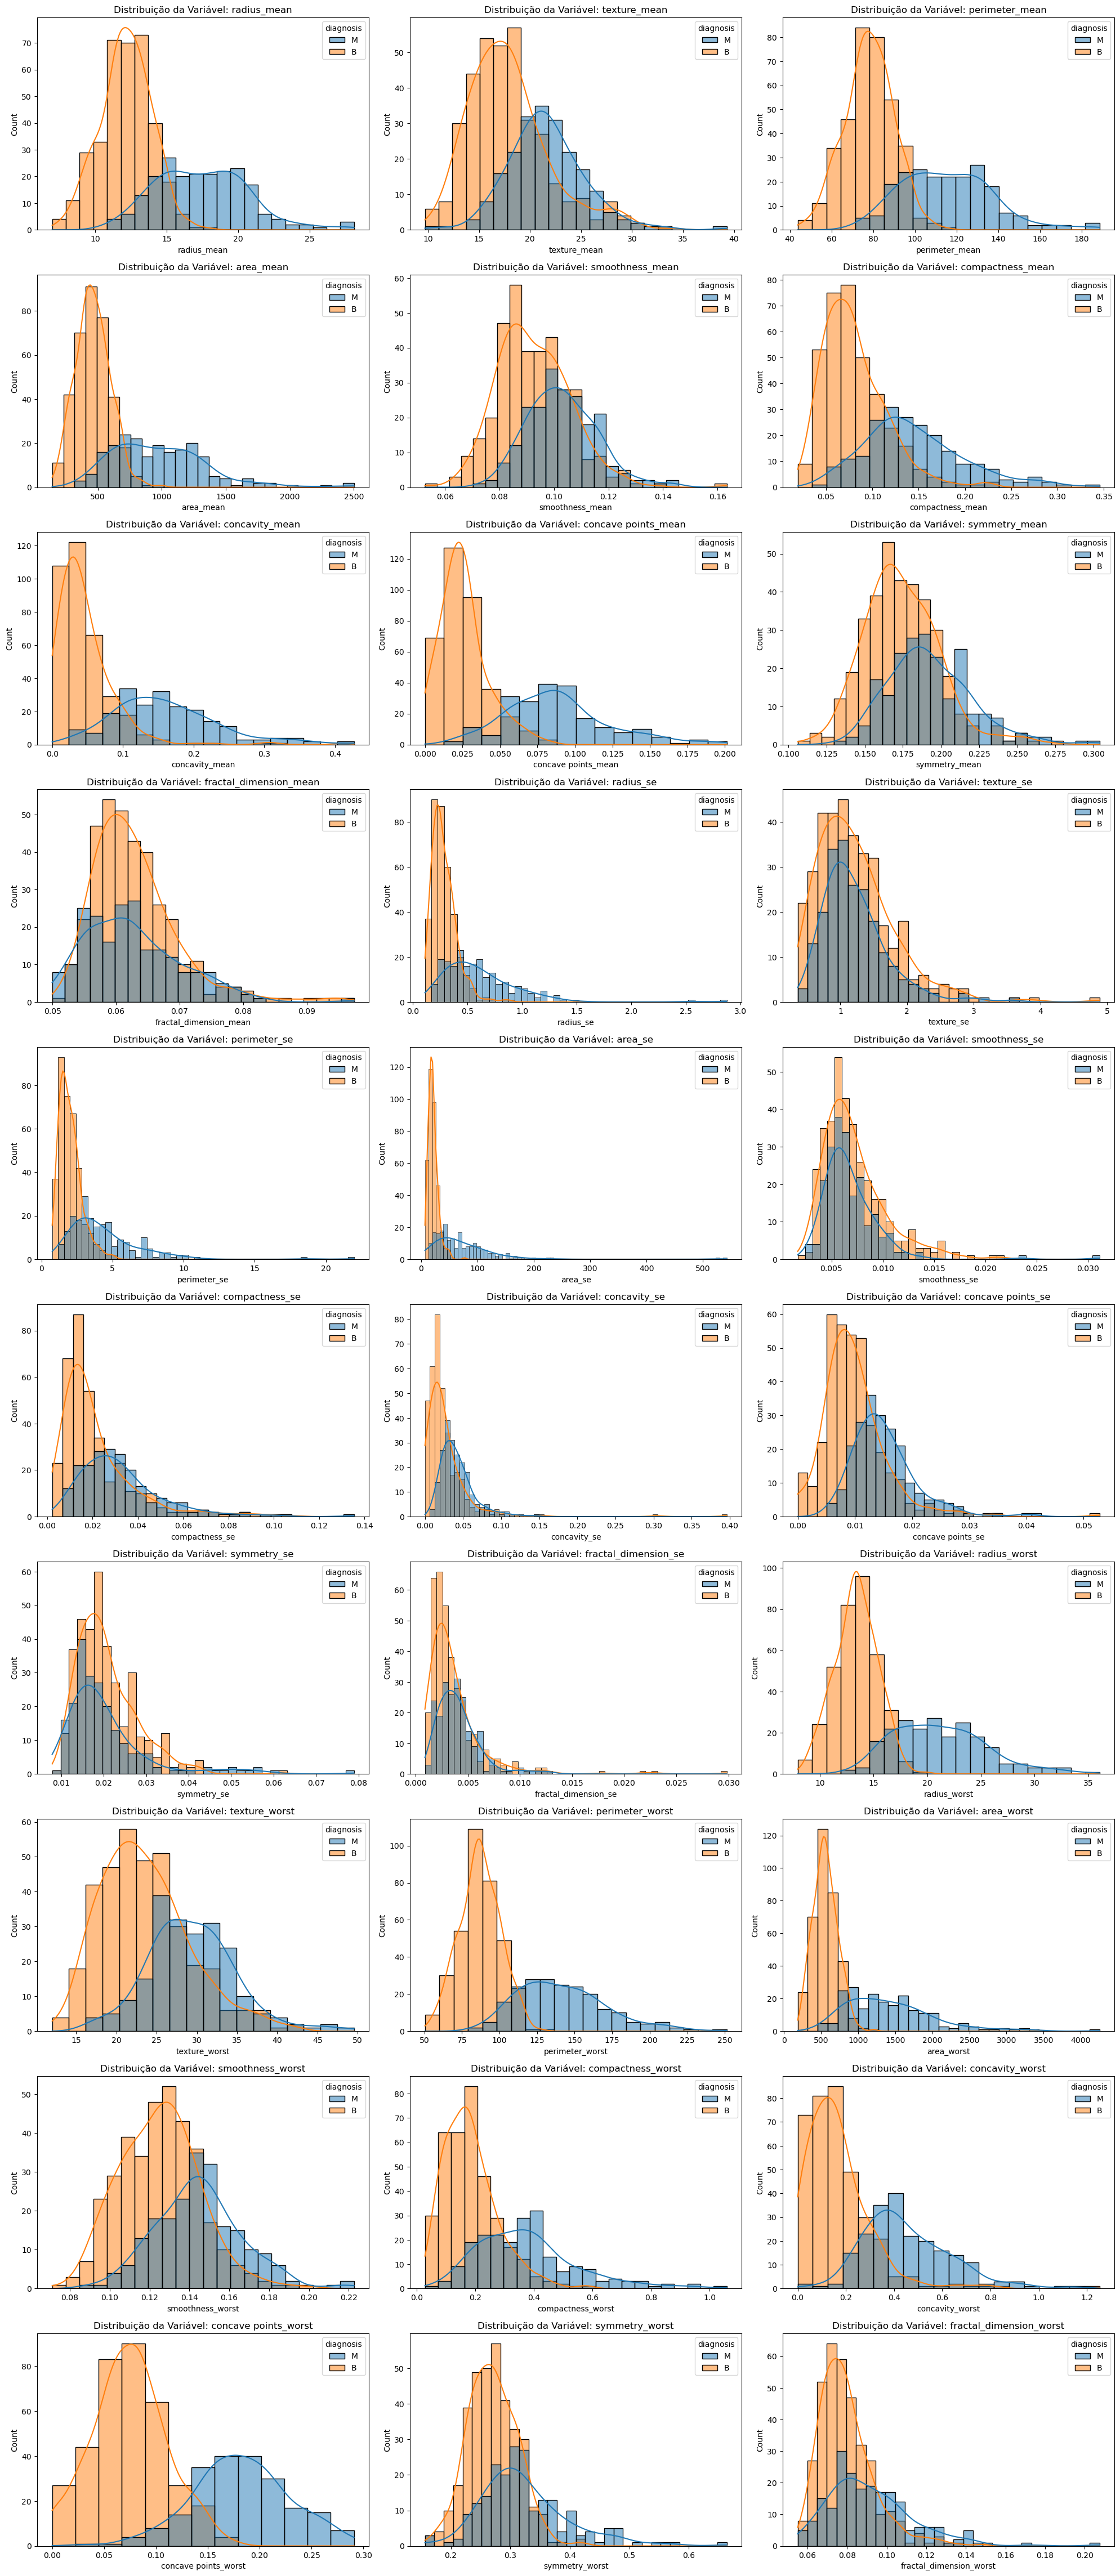

In [8]:
# ANÁLISE DE CORRELAÇÃO - HISTPLOT
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(20, 50))
axes = axes.flatten()

for i, coluna in enumerate(dados.columns[1:]):
    sns.histplot(data=dados, x=coluna, kde=True, hue=dados['diagnosis'], ax=axes[i])
    axes[i].set_title(f"Distribuição da Variável: {coluna}")

# Remove subplots não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('histogramas.png')
plt.show()

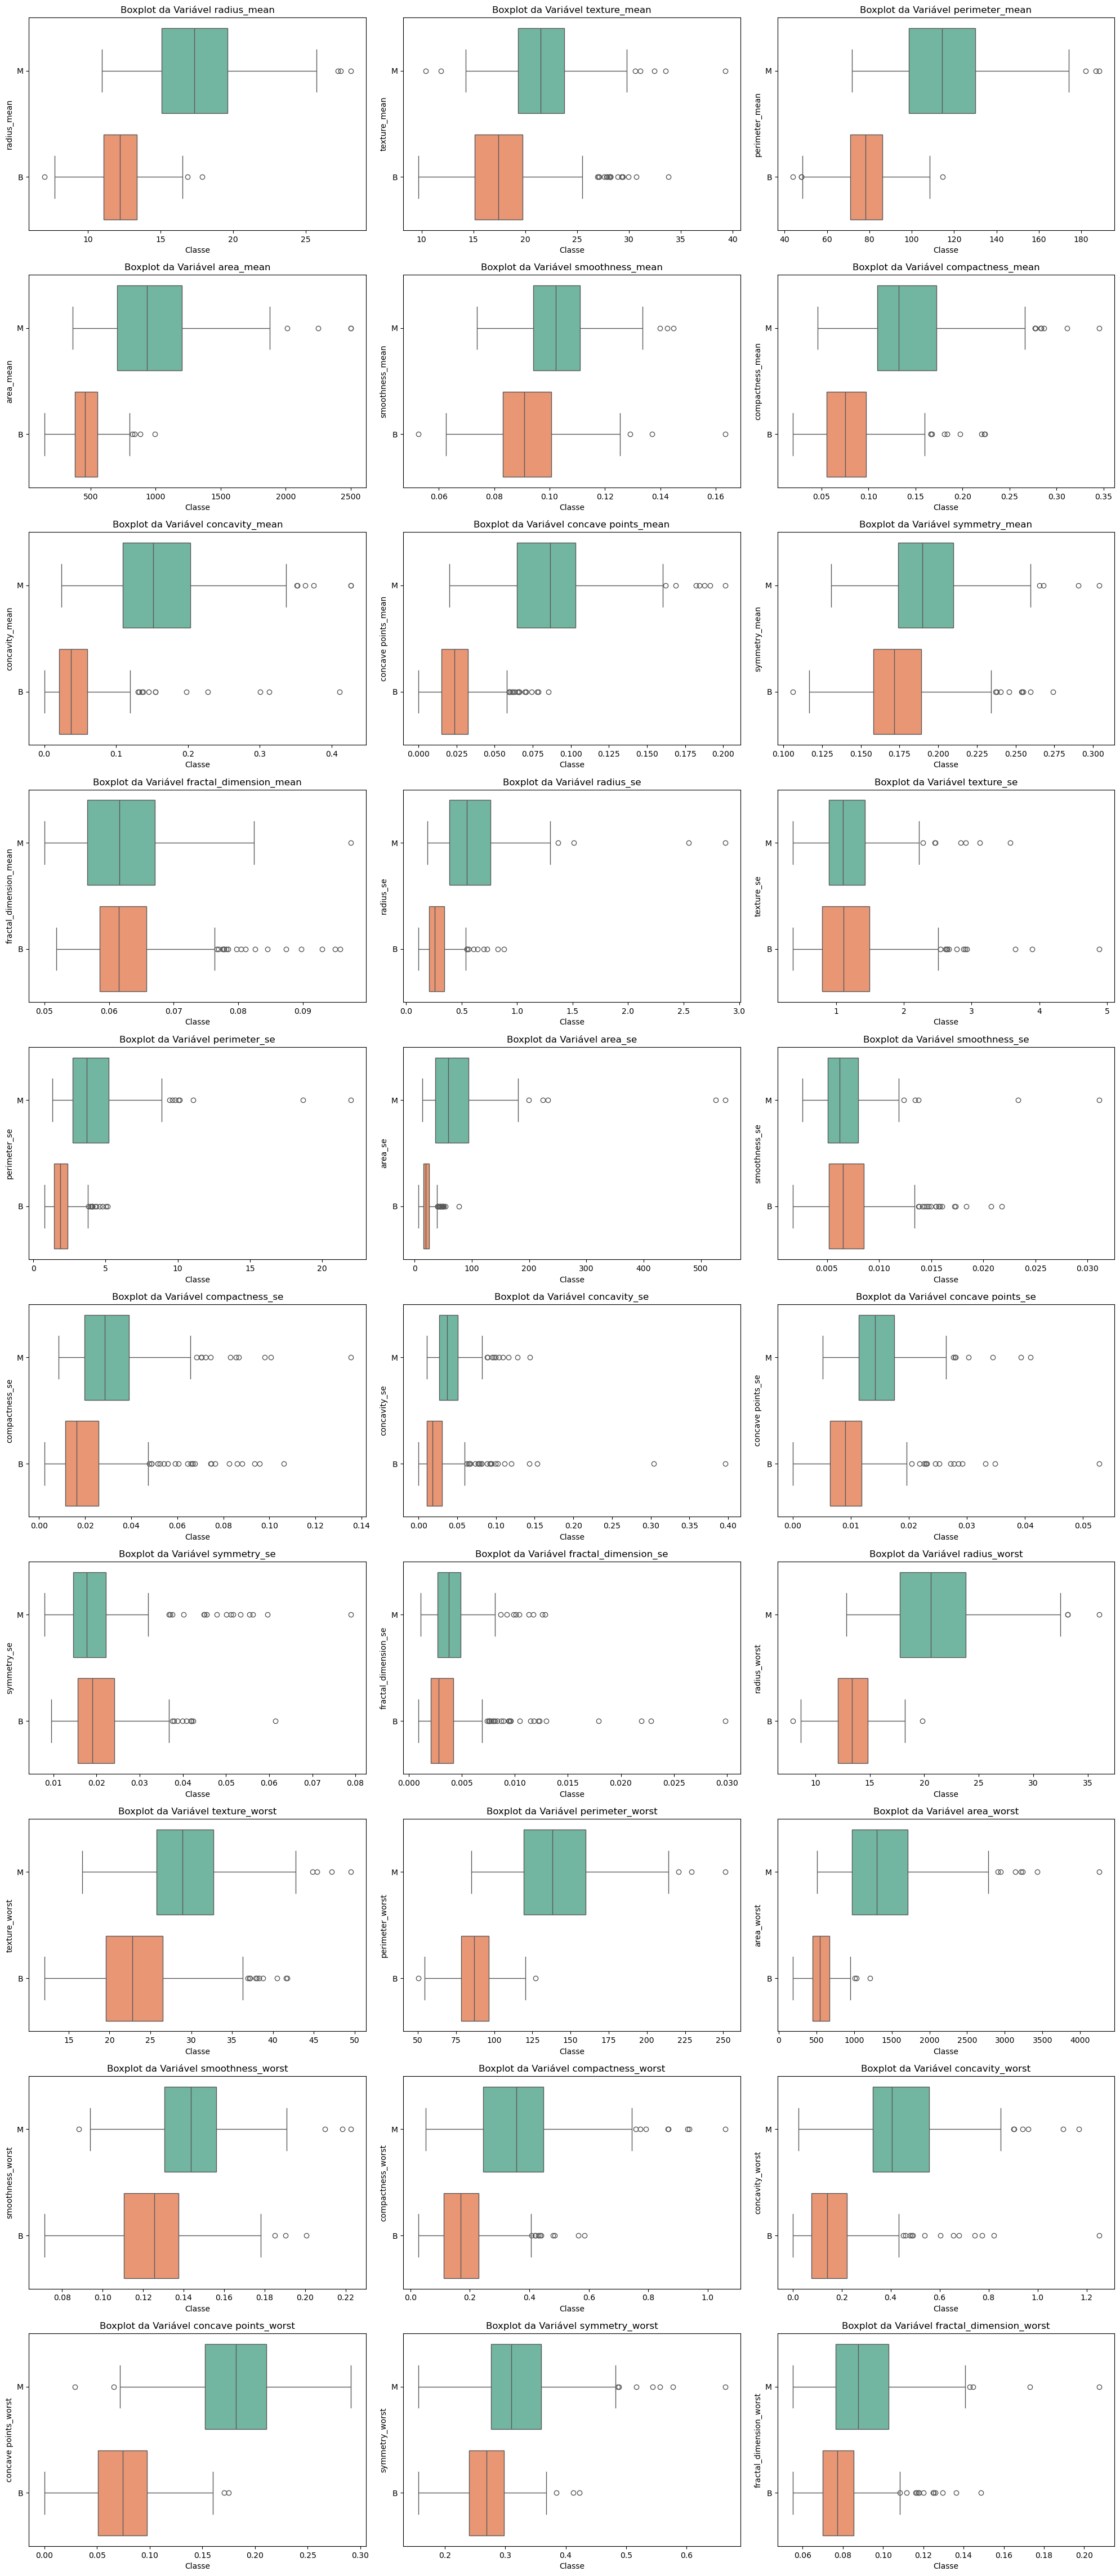

In [9]:
# ANÁLISE DE CORRELAÇÃO - BOXPLOT
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(20, 50))
axes = axes.flatten()

for i, coluna in enumerate(dados.columns[1:]):
    sns.boxplot(y=dados['diagnosis'], x=dados[coluna], ax=axes[i], palette="Set2")
    axes[i].set_title(f"Boxplot da Variável {coluna}")
    axes[i].set_xlabel("Classe")
    axes[i].set_ylabel(coluna)

# Remove subplots não utilizados (caso existam)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

In [10]:
# SEPARAÇÃO DOS DADOS FEATURES / TARGET

# vamos fazer uma pequena transformação na coluna diagnosis criando um dataset auxiliar
dados_ohe = pd.get_dummies(dados, columns=['diagnosis'], drop_first=True) # Cria coluna: diagnosis_M

X = dados_ohe.drop(columns=['diagnosis_M'])
y = dados_ohe['diagnosis_M']

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [11]:
# PRÉ-PROCESSAMENTO
# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

colunas = X.columns ## salvando os nomes das colunas para podermos recuperá-los depois
df_X_scaled = pd.DataFrame(X_scaled, columns=colunas)
df_X_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


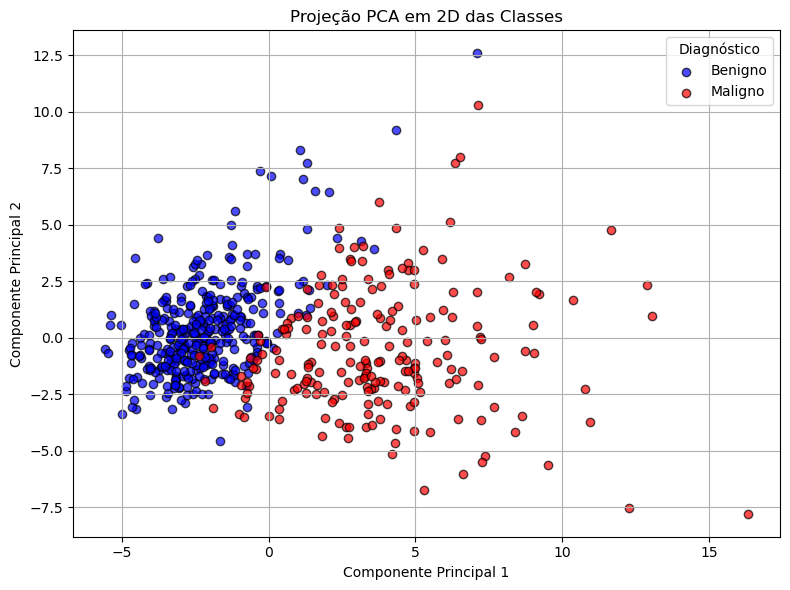

In [12]:
# PCA para 2 Dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_X_scaled)

cores = {0: 'blue', 1: 'red'}
rotulos = {0: 'Benigno', 1: 'Maligno'}

plt.figure(figsize=(8, 6))
for classe in [0, 1]:
    plt.scatter(X_pca[y == classe, 0], X_pca[y == classe, 1],
                c=cores[classe], label=rotulos[classe], alpha=0.7, edgecolors='k')

plt.legend(title="Diagnóstico")
plt.title("Projeção PCA em 2D das Classes")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# ANÁLISE DE EXPLICABILIDADE DO PCA 2D
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208])

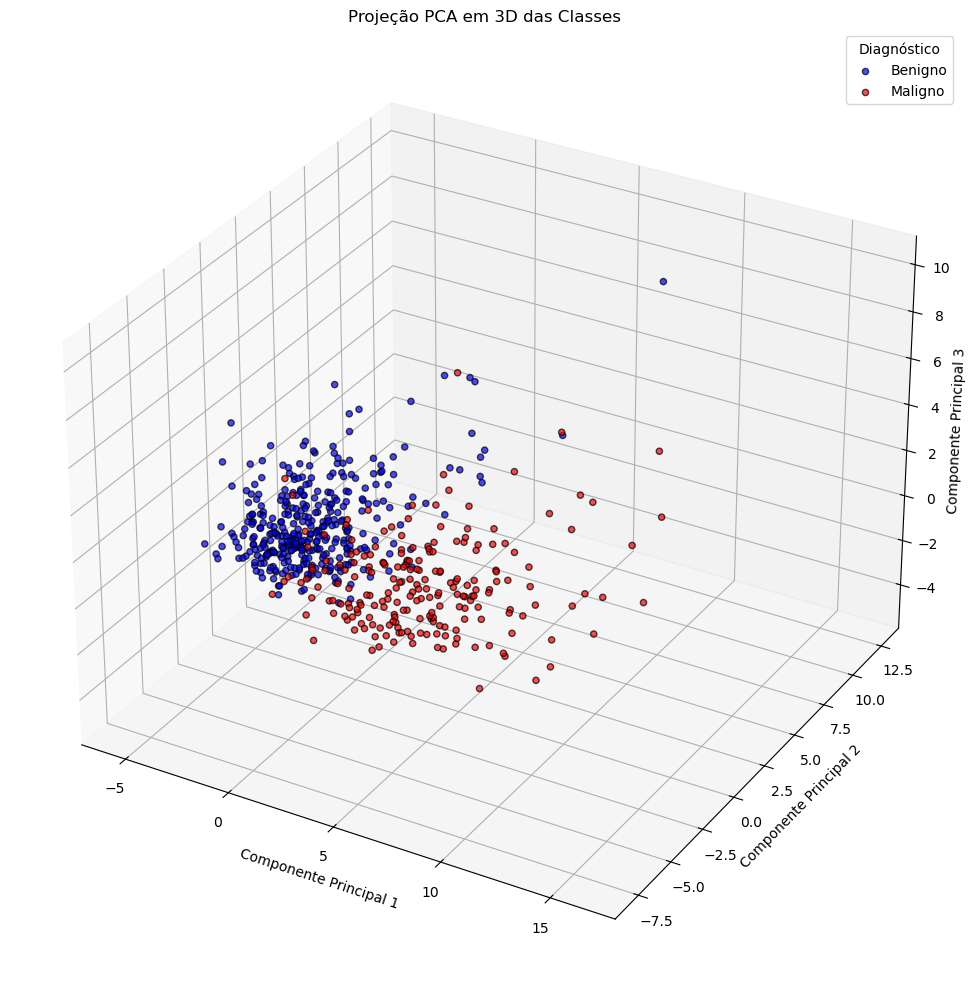

In [14]:
# PCA para 3 Dimensões
pca_3d = PCA(n_components=3)
X_pca = pca_3d.fit_transform(df_X_scaled)

cores = {0: 'blue', 1: 'red'}
rotulos = {0: 'Benigno', 1: 'Maligno'}

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for classe in [0, 1]:
    ax.scatter(X_pca[y == classe, 0], X_pca[y == classe, 1], X_pca[y == classe, 2],
               c=cores[classe], label=rotulos[classe], alpha=0.7, edgecolors='k')

ax.legend(title='Diagnóstico')
ax.set_title('Projeção PCA em 3D das Classes')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.tight_layout()
ax.set_zlabel('Componente Principal 3', labelpad=1)
plt.show()


In [15]:
# ANÁLISE DE EXPLICABILIDADE DO PCA 3D
pca_3d.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371])

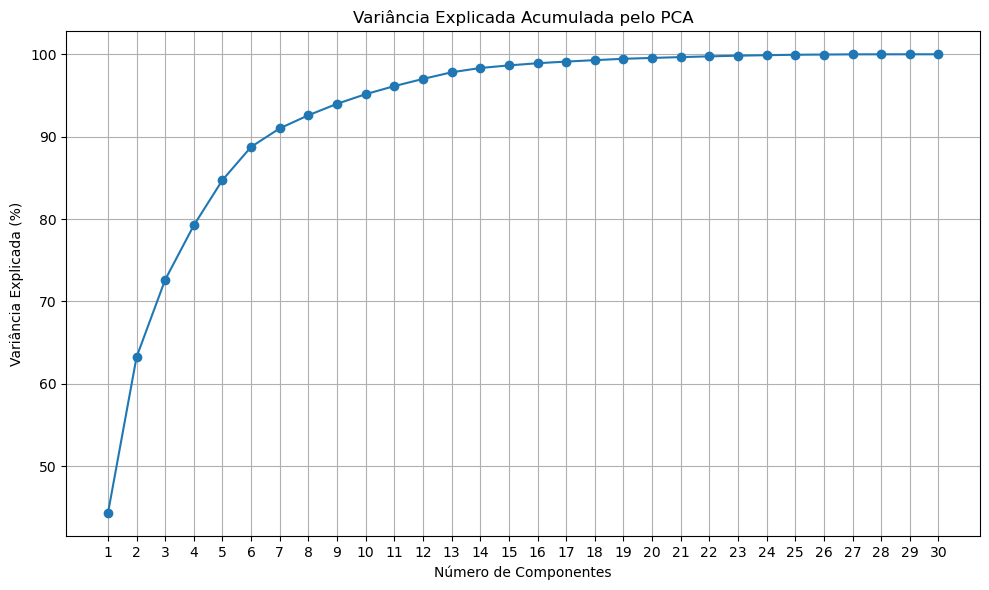

In [16]:
# ANALISE PCA x QUANTIDADE FEATURES
pca = PCA(n_components=X_scaled.shape[1])
pca.fit(df_X_scaled)

# Variância explicada acumulada
variancia_acumulada = pca.explained_variance_ratio_.cumsum()

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada * 100, marker='o')
plt.title("Variância Explicada Acumulada pelo PCA")
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada (%)")
plt.grid(True)
plt.xticks(range(1, len(variancia_acumulada) + 1))
plt.tight_layout()
#plt.savefig("pca_explicabilidade.png")
plt.show()

### notem que com 10 features explicamos 95% da variabilidade dos dados

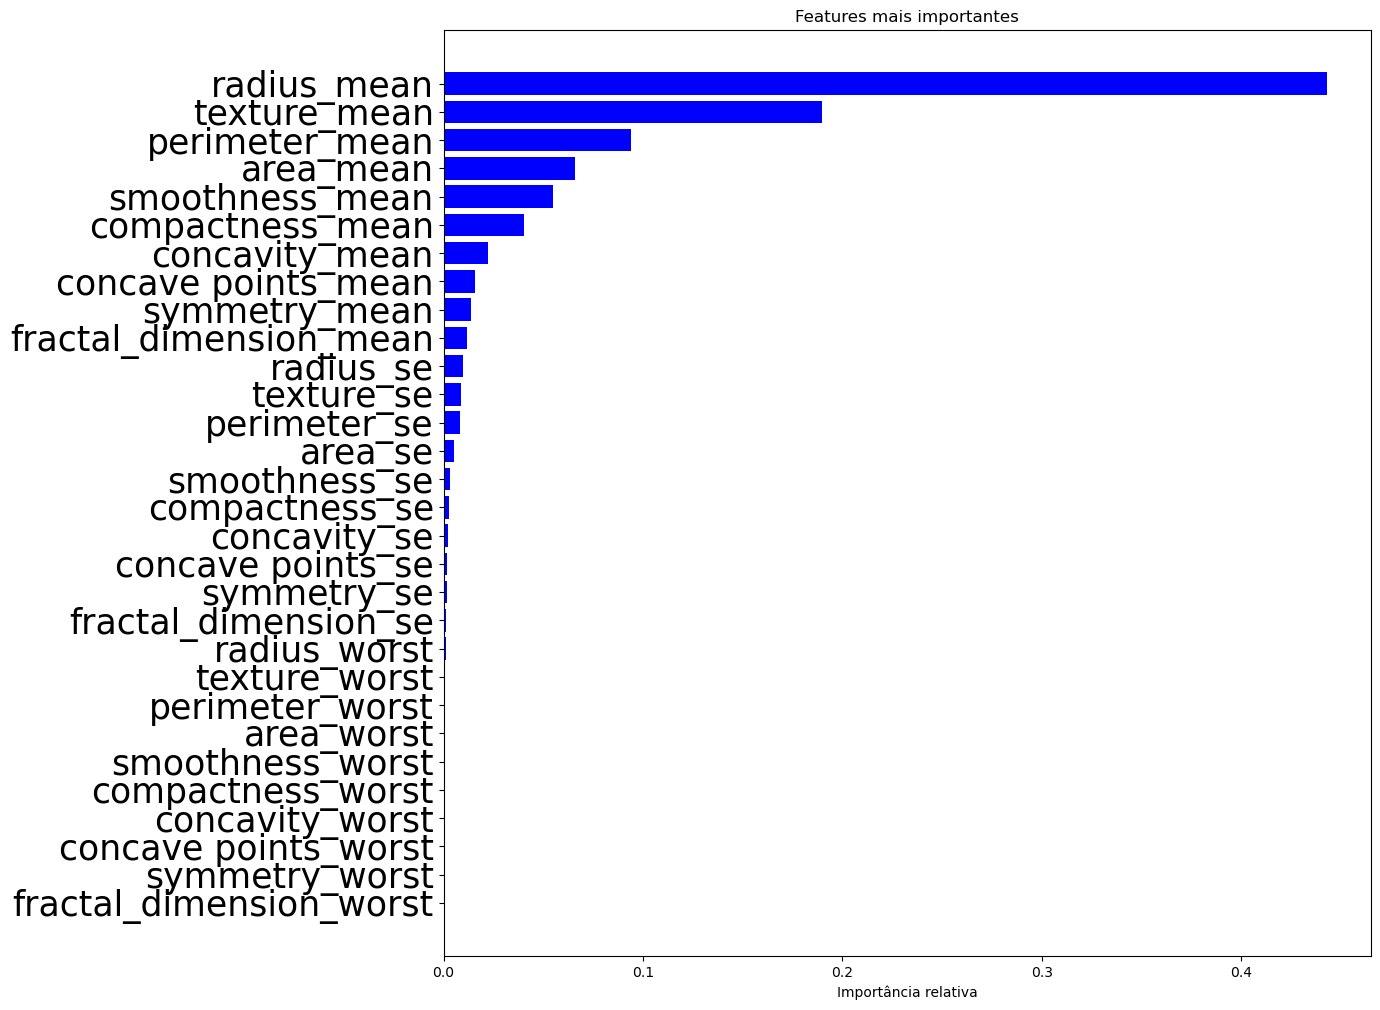

In [17]:
# ANÁLISE DE IMPORTÂNCIA DAS FEATURES
pca = PCA()
pca_result = pca.fit_transform(df_X_scaled)
var_exp = pca.explained_variance_ratio_

importances = var_exp
attributes = df_X_scaled.columns
indices = np.argsort(importances)
attributes_rank = []

for i in indices:
    attributes_rank.append(attributes[i])
plt.figure(figsize=(10, 10))
plt.title('Features mais importantes')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Importância relativa')
plt.show()

In [18]:
# PCA para 10 Dimensões
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(df_X_scaled)

In [19]:
num_features = X_pca.shape[1]
num_features

10

In [20]:
## lembrando que salvamos o ranking das features em attributes
attributes [0:num_features] # listando somante as 10 primeiras

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [21]:
df_X_pca=pd.DataFrame(X_pca, columns=attributes[0:num_features])

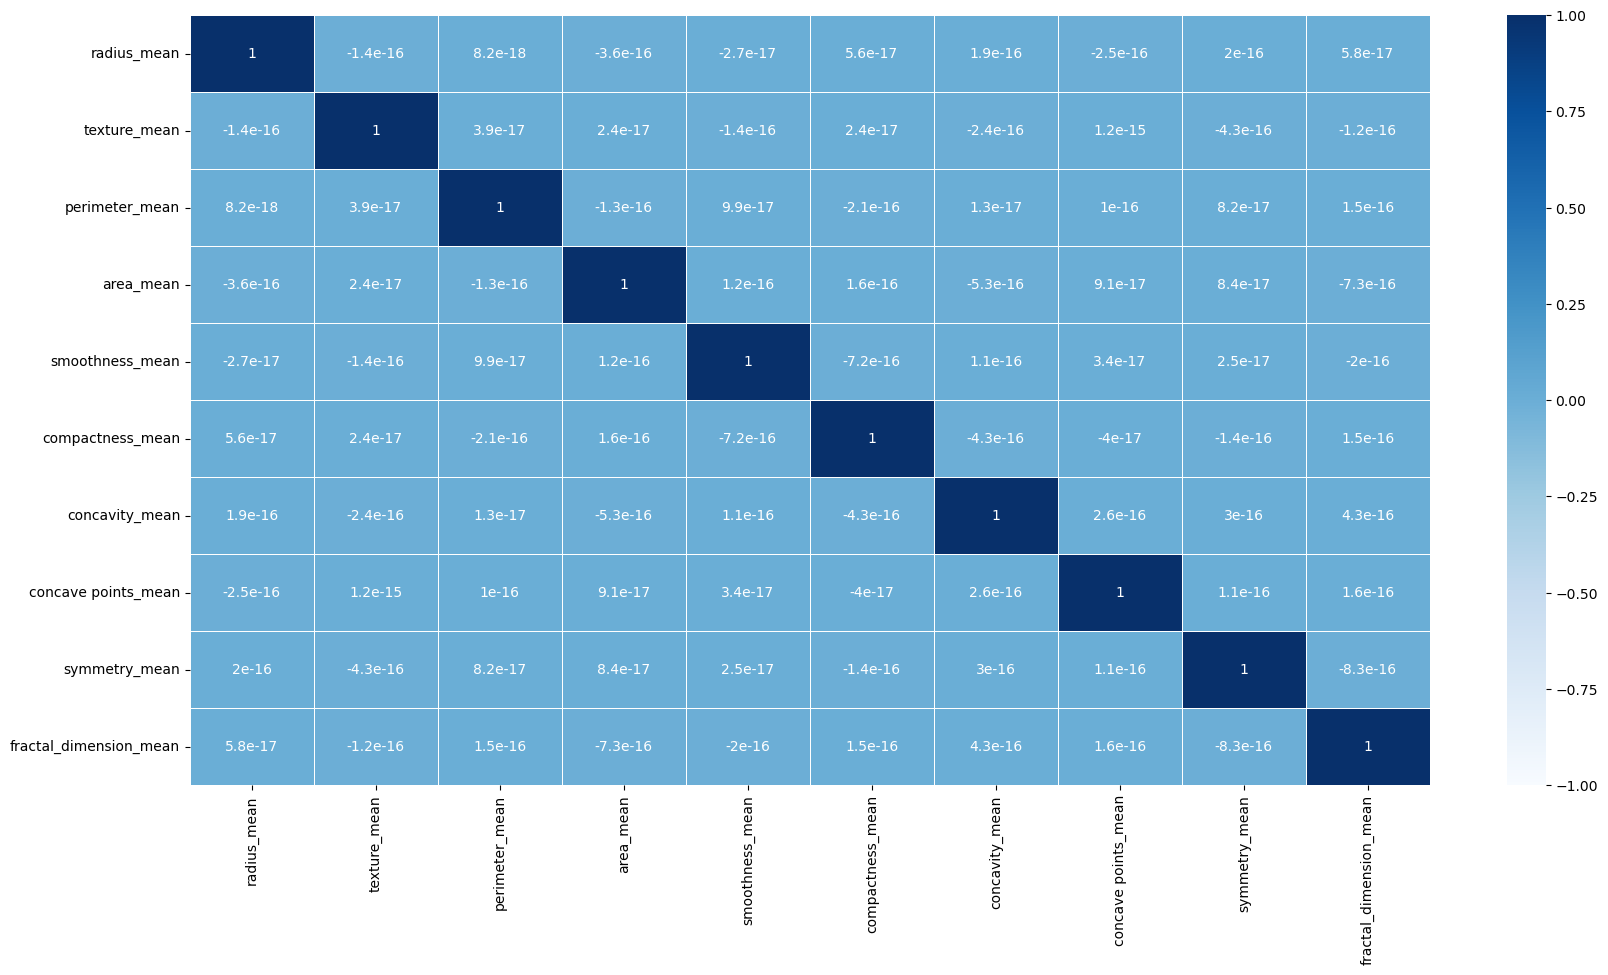

In [22]:
# ANÁLISE DE CORRELAÇÃO DOS DADOS SCALED - HEATMAP
plt.figure(figsize=(20, 10))
sns.heatmap(pd.DataFrame(df_X_pca).corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=0.5)
plt.show()

### Não temos mais variáveis correlacionadas

## Classificação

Vamos comparar diversos métodos de classificação, usando validação cruzada. Como os dados são desbalanceados, precisamos levar essa informação em conta na validação. Para mediar a precisão da classificação, podemos usar a área sobre a curva Roc (AUC). Vamos comparar vários classificadores.

Inicialmente, vamos considerar o métodos mais simples, o k-vizinhos mais próximos. Usando validação cruzada, podemos encontrar o melhor valor de k.

In [23]:
# Separar em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# FUNCTION QUE IMPRIME AS MÉTRICAS DE CLASSIFICAÇÃO
metricas_curva_roc = []

def imprimeMetricas(y_real, y_pred):
    acuracia = accuracy_score(y_real, y_pred)
    precisao = precision_score(y_real, y_pred)
    recall = recall_score(y_real, y_pred)
    f1score = f1_score(y_real, y_pred)
    classif = classification_report(y_real, y_pred, digits=4)
    print(f"Acuracia: {acuracia:.4f}")
    print(f"Precisao: {precisao:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1score:.4f}\n")
    print(f"Classification Report:\n {classif}")

def imprimeMatrizConfusao(y_test, y_pred, norm=None):
    cm = confusion_matrix(y_test, y_pred, normalize=norm)
    fig, ax = plt.subplots()

    # Define o formato de exibição
    fmt = ".3f" if norm else "d"

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benigno', 'Maligno'])
    disp.plot(ax=ax, values_format=fmt)

    if (norm):
        ax.set_title("Matriz de Confusão Normalizada")
    else:
        ax.set_title("Matriz de Confusão")

    plt.show()

### KNN

  File "C:\Users\Paulo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


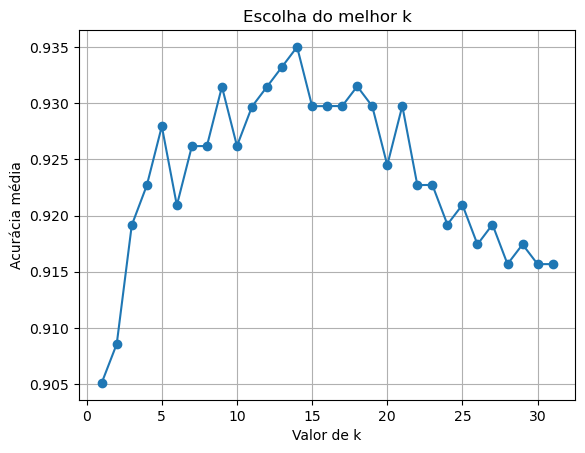

Melhor valor de k: 14


In [25]:
k_values = range(1, 32)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
    scores.append(cv_score.mean())

# Plotando a curva de acurácia
plt.plot(k_values, scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia média')
plt.title('Escolha do melhor k')
plt.grid(True)
plt.show()

# Melhor valor de k
melhor_k = k_values[scores.index(max(scores))]
print(f"Melhor valor de k: {melhor_k}")


Após encontrar o melhor valor de $k$, podemos fazer a classificação usando o método dos k-vizinhos nos dados desconhecidos. Os resultados serão gravados em um arquivo para submetermos ao Kaggle.

Acuracia: 0.9474
Precisao: 0.9737
Recall: 0.8810
F1 Score: 0.9250

Classification Report:
               precision    recall  f1-score   support

       False     0.9342    0.9861    0.9595        72
        True     0.9737    0.8810    0.9250        42

    accuracy                         0.9474       114
   macro avg     0.9539    0.9335    0.9422       114
weighted avg     0.9488    0.9474    0.9468       114



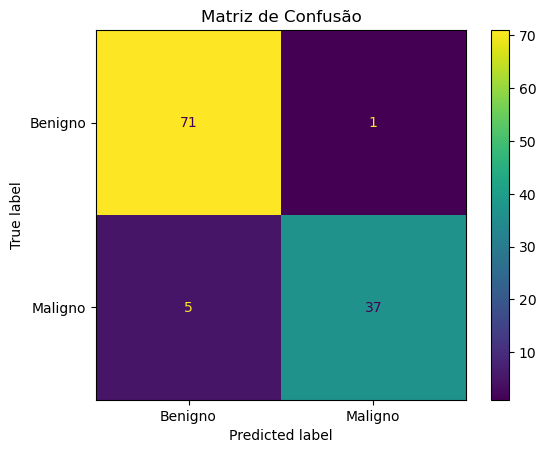

In [26]:
model_knn = KNeighborsClassifier(n_neighbors=14)
model_knn.fit(X_train,  y_train)


y_pred = model_knn.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
metricas_curva_roc.append(("K-Nearest Neighbors", fpr, tpr))

imprimeMetricas(y_test, y_pred)
imprimeMatrizConfusao(y_test, y_pred)

### Decision Tree

In [27]:
# Parâmetros a testar
criterios = ['gini', 'entropy']
profundidades = [1, 2, 3, 4, 5, None]  # None = sem limite de profundidade

# Armazenar resultados
resultados = []

for criterio in criterios:
    for profundidade in profundidades:
        clf = DecisionTreeClassifier(criterion=criterio, max_depth=profundidade, random_state=42)
        scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
        media = np.mean(scores)
        resultados.append({
            'criterio': criterio,
            'profundidade': profundidade,
            'score_medio': media
        })

# Exibir os resultados
for r in resultados:
    print(f"Critério: {r['criterio']}, Profundidade: {r['profundidade']}, Score médio: {r['score_medio']:.4f}")

melhor = max(resultados, key=lambda x: x['score_medio'])

print("\n🔍 Melhor combinação encontrada:")
print(f"Critério: {melhor['criterio']}")
print(f"Profundidade: {melhor['profundidade']}")
print(f"Score médio: {melhor['score_medio']:.4f}")


Critério: gini, Profundidade: 1, Score médio: 0.8998
Critério: gini, Profundidade: 2, Score médio: 0.9280
Critério: gini, Profundidade: 3, Score médio: 0.9191
Critério: gini, Profundidade: 4, Score médio: 0.9209
Critério: gini, Profundidade: 5, Score médio: 0.9191
Critério: gini, Profundidade: None, Score médio: 0.9173
Critério: entropy, Profundidade: 1, Score médio: 0.9051
Critério: entropy, Profundidade: 2, Score médio: 0.9174
Critério: entropy, Profundidade: 3, Score médio: 0.9333
Critério: entropy, Profundidade: 4, Score médio: 0.9420
Critério: entropy, Profundidade: 5, Score médio: 0.9332
Critério: entropy, Profundidade: None, Score médio: 0.9367

🔍 Melhor combinação encontrada:
Critério: entropy
Profundidade: 4
Score médio: 0.9420


Acuracia: 0.9211
Precisao: 0.9024
Recall: 0.8810
F1 Score: 0.8916

Classification Report:
               precision    recall  f1-score   support

       False     0.9315    0.9444    0.9379        72
        True     0.9024    0.8810    0.8916        42

    accuracy                         0.9211       114
   macro avg     0.9170    0.9127    0.9147       114
weighted avg     0.9208    0.9211    0.9208       114



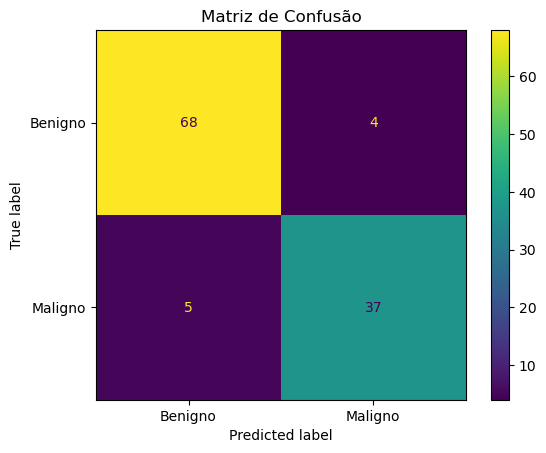

In [28]:
# DECISION TREE - Árvore de Decisão
# Usando os melhores parâmetros encontrados
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# Treinar o modelo
model_tree.fit(X_train, y_train)

# Fazer previsões
y_pred = model_tree.predict(X_test)

# Avaliar o desempenho
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
metricas_curva_roc.append(("Decision Tree", fpr, tpr))

imprimeMetricas(y_test, y_pred)
imprimeMatrizConfusao(y_test, y_pred)

### Random Forest

In [29]:
# RANDOM FOREST - Floresta Aleatória
# Parâmetros a testar
n_estimators_list = [10, 50, 100]
max_depth_list = [None, 3, 4, 5]
criterios = ['gini', 'entropy']

# Armazenar resultados
resultados = []

for n in n_estimators_list:
    for depth in max_depth_list:
        for criterio in criterios:
            modelo = RandomForestClassifier(
                n_estimators=n,
                max_depth=depth,
                criterion=criterio,
                random_state=42
            )
            scores = cross_val_score(modelo, X, y, cv=5)
            media = np.mean(scores)
            resultados.append({
                'n_estimators': n,
                'max_depth': depth,
                'criterion': criterio,
                'score_medio': media
            })

# Exibir os resultados
for r in resultados:
    print(f"n_estimators: {r['n_estimators']}, max_depth: {r['max_depth']}, "
          f"criterion: {r['criterion']}, score médio: {r['score_medio']:.4f}")

melhor = max(resultados, key=lambda x: x['score_medio'])

# Exibir os melhores parâmetros
print("\n🔍 Melhor combinação encontrada:")
print(f"n_estimators: {melhor['n_estimators']}")
print(f"max_depth: {melhor['max_depth']}")
print(f"criterion: {melhor['criterion']}")
print(f"Score médio: {melhor['score_medio']:.4f}")



n_estimators: 10, max_depth: None, criterion: gini, score médio: 0.9561
n_estimators: 10, max_depth: None, criterion: entropy, score médio: 0.9508
n_estimators: 10, max_depth: 3, criterion: gini, score médio: 0.9508
n_estimators: 10, max_depth: 3, criterion: entropy, score médio: 0.9455
n_estimators: 10, max_depth: 4, criterion: gini, score médio: 0.9508
n_estimators: 10, max_depth: 4, criterion: entropy, score médio: 0.9490
n_estimators: 10, max_depth: 5, criterion: gini, score médio: 0.9596
n_estimators: 10, max_depth: 5, criterion: entropy, score médio: 0.9649
n_estimators: 50, max_depth: None, criterion: gini, score médio: 0.9543
n_estimators: 50, max_depth: None, criterion: entropy, score médio: 0.9684
n_estimators: 50, max_depth: 3, criterion: gini, score médio: 0.9543
n_estimators: 50, max_depth: 3, criterion: entropy, score médio: 0.9578
n_estimators: 50, max_depth: 4, criterion: gini, score médio: 0.9596
n_estimators: 50, max_depth: 4, criterion: entropy, score médio: 0.9631
n

Acuracia: 0.9474
Precisao: 0.9500
Recall: 0.9048
F1 Score: 0.9268

Classification Report:
               precision    recall  f1-score   support

       False     0.9459    0.9722    0.9589        72
        True     0.9500    0.9048    0.9268        42

    accuracy                         0.9474       114
   macro avg     0.9480    0.9385    0.9429       114
weighted avg     0.9474    0.9474    0.9471       114



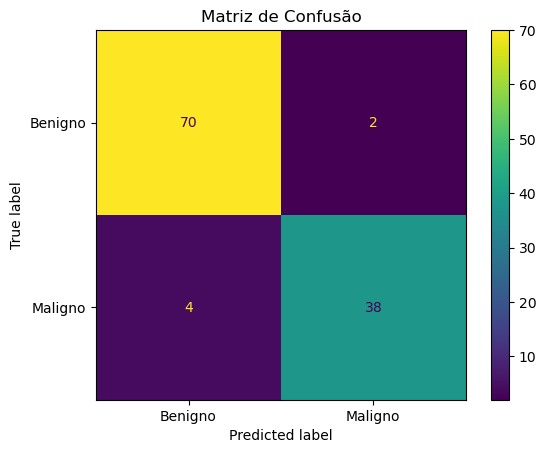

In [30]:
# Criar o modelo com os melhores parâmetros
model_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    criterion='entropy',
    random_state=42
)

# Treinar o modelo
model_rf.fit(X_train, y_train)

# Fazer previsões
y_pred = model_rf.predict(X_test)

# Avaliar o desempenho
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
metricas_curva_roc.append(("Random Forest", fpr, tpr))

imprimeMetricas(y_test, y_pred)
imprimeMatrizConfusao(y_test, y_pred)


### SVM - Support Vector Machine

In [31]:
# Parâmetros a testar
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
C_values = [0.01, 0.1, 1, 10, 100]

# Armazenar resultados
resultados = []

for kernel in kernels:
    for C in C_values:
        clf = SVC(kernel=kernel, C=C, random_state=42)
        scores = cross_val_score(clf, X, y, cv=5)
        media = np.mean(scores)
        resultados.append({
            'kernel': kernel,
            'C': C,
            'score_medio': media
        })

# Exibir os resultados
for r in resultados:
    print(f"Kernel: {r['kernel']}, C: {r['C']}, Score médio: {r['score_medio']:.4f}")

# Melhor combinação
melhor = max(resultados, key=lambda x: x['score_medio'])

print("\n🔍 Melhor combinação encontrada:")
print(f"Kernel: {melhor['kernel']}")
print(f"C: {melhor['C']}")
print(f"Score médio: {melhor['score_medio']:.4f}")

Kernel: linear, C: 0.01, Score médio: 0.9455
Kernel: linear, C: 0.1, Score médio: 0.9490
Kernel: linear, C: 1, Score médio: 0.9455
Kernel: linear, C: 10, Score médio: 0.9508
Kernel: linear, C: 100, Score médio: 0.9490
Kernel: rbf, C: 0.01, Score médio: 0.7892
Kernel: rbf, C: 0.1, Score médio: 0.8911
Kernel: rbf, C: 1, Score médio: 0.9122
Kernel: rbf, C: 10, Score médio: 0.9227
Kernel: rbf, C: 100, Score médio: 0.9315
Kernel: poly, C: 0.01, Score médio: 0.8542
Kernel: poly, C: 0.1, Score médio: 0.8858
Kernel: poly, C: 1, Score médio: 0.9087
Kernel: poly, C: 10, Score médio: 0.9210
Kernel: poly, C: 100, Score médio: 0.9245
Kernel: sigmoid, C: 0.01, Score médio: 0.6274
Kernel: sigmoid, C: 0.1, Score médio: 0.6274
Kernel: sigmoid, C: 1, Score médio: 0.4604
Kernel: sigmoid, C: 10, Score médio: 0.4024
Kernel: sigmoid, C: 100, Score médio: 0.3954

🔍 Melhor combinação encontrada:
Kernel: linear
C: 10
Score médio: 0.9508


Acuracia: 0.9737
Precisao: 0.9756
Recall: 0.9524
F1 Score: 0.9639

Classification Report:
               precision    recall  f1-score   support

       False     0.9726    0.9861    0.9793        72
        True     0.9756    0.9524    0.9639        42

    accuracy                         0.9737       114
   macro avg     0.9741    0.9692    0.9716       114
weighted avg     0.9737    0.9737    0.9736       114



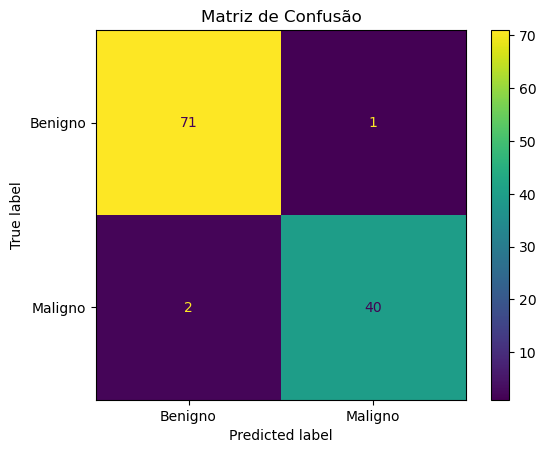

In [32]:
# Criar o modelo com os melhores parâmetros
model_svc = SVC(
    kernel='linear',
    C=10,
    random_state=42
)

# Treinar o modelo
model_svc.fit(X_train, y_train)

# Fazer previsões
y_pred = model_svc.predict(X_test)

# Avaliar o desempenho
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
metricas_curva_roc.append(("SVM", fpr, tpr))

imprimeMetricas(y_test, y_pred)
imprimeMatrizConfusao(y_test, y_pred)

### XGBoost

In [33]:
# Parâmetros a testar
depths = [3, 5, 7]
learning_rates = [0.01, 0.1, 0.3]
n_estimators_list = [50, 100, 200]

# Armazenar resultados
resultados = []

for max_depth in depths:
    for learning_rate in learning_rates:
        for n_estimators in n_estimators_list:
            clf = XGBClassifier(
                max_depth=max_depth,
                learning_rate=learning_rate,
                n_estimators=n_estimators,
                use_label_encoder=False,
                eval_metric='logloss',
                random_state=42
            )
            scores = cross_val_score(clf, X, y, cv=5)
            media = np.mean(scores)
            resultados.append({
                'max_depth': max_depth,
                'learning_rate': learning_rate,
                'n_estimators': n_estimators,
                'score_medio': media
            })

# Exibir os resultados
for r in resultados:
    print(f"max_depth: {r['max_depth']}, learning_rate: {r['learning_rate']}, n_estimators: {r['n_estimators']}, Score médio: {r['score_medio']:.4f}")

# Melhor combinação
melhor = max(resultados, key=lambda x: x['score_medio'])

print("\n🔍 Melhor combinação encontrada:")
print(f"max_depth: {melhor['max_depth']}")
print(f"learning_rate: {melhor['learning_rate']}")
print(f"n_estimators: {melhor['n_estimators']}")
print(f"Score médio: {melhor['score_medio']:.4f}")

max_depth: 3, learning_rate: 0.01, n_estimators: 50, Score médio: 0.9262
max_depth: 3, learning_rate: 0.01, n_estimators: 100, Score médio: 0.9561
max_depth: 3, learning_rate: 0.01, n_estimators: 200, Score médio: 0.9596
max_depth: 3, learning_rate: 0.1, n_estimators: 50, Score médio: 0.9649
max_depth: 3, learning_rate: 0.1, n_estimators: 100, Score médio: 0.9684
max_depth: 3, learning_rate: 0.1, n_estimators: 200, Score médio: 0.9736
max_depth: 3, learning_rate: 0.3, n_estimators: 50, Score médio: 0.9684
max_depth: 3, learning_rate: 0.3, n_estimators: 100, Score médio: 0.9683
max_depth: 3, learning_rate: 0.3, n_estimators: 200, Score médio: 0.9683
max_depth: 5, learning_rate: 0.01, n_estimators: 50, Score médio: 0.9315
max_depth: 5, learning_rate: 0.01, n_estimators: 100, Score médio: 0.9544
max_depth: 5, learning_rate: 0.01, n_estimators: 200, Score médio: 0.9631
max_depth: 5, learning_rate: 0.1, n_estimators: 50, Score médio: 0.9702
max_depth: 5, learning_rate: 0.1, n_estimators: 10

Acuracia: 0.9561
Precisao: 0.9512
Recall: 0.9286
F1 Score: 0.9398

Classification Report:
               precision    recall  f1-score   support

       False     0.9589    0.9722    0.9655        72
        True     0.9512    0.9286    0.9398        42

    accuracy                         0.9561       114
   macro avg     0.9551    0.9504    0.9526       114
weighted avg     0.9561    0.9561    0.9560       114



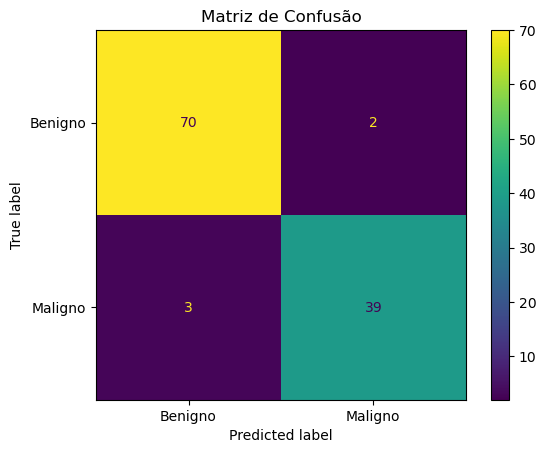

In [34]:
# Criar o modelo com os melhores parâmetros
model_xgb = XGBClassifier(
    max_depth=5,
    n_estimators=200,
    random_state=42
)

# Treinar o modelo
model_xgb.fit(X_train, y_train)

# Fazer previsões
y_pred = model_xgb.predict(X_test)

# Avaliar o desempenho
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
metricas_curva_roc.append(("XGBoost", fpr, tpr))

imprimeMetricas(y_test, y_pred)
imprimeMatrizConfusao(y_test, y_pred)

### Logistic Regression
(o "feijão com arroz")

Acuracia: 0.9825
Precisao: 1.0000
Recall: 0.9524
F1 Score: 0.9756

Classification Report:
               precision    recall  f1-score   support

       False     0.9730    1.0000    0.9863        72
        True     1.0000    0.9524    0.9756        42

    accuracy                         0.9825       114
   macro avg     0.9865    0.9762    0.9810       114
weighted avg     0.9829    0.9825    0.9824       114



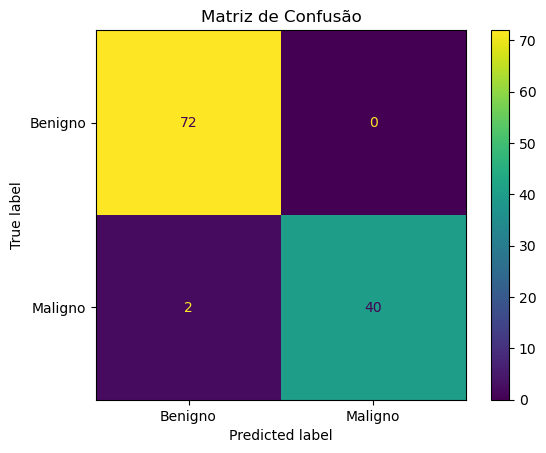

In [35]:
model_rl = LogisticRegression(multi_class = 'auto', random_state=42)
model_rl.fit(X_train, y_train)

y_pred = model_rl.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
metricas_curva_roc.append(("Regressão Logística", fpr, tpr))

imprimeMetricas(y_test, y_pred)
imprimeMatrizConfusao(y_test, y_pred)

## Plotando as curvas ROC para comparar os modelos

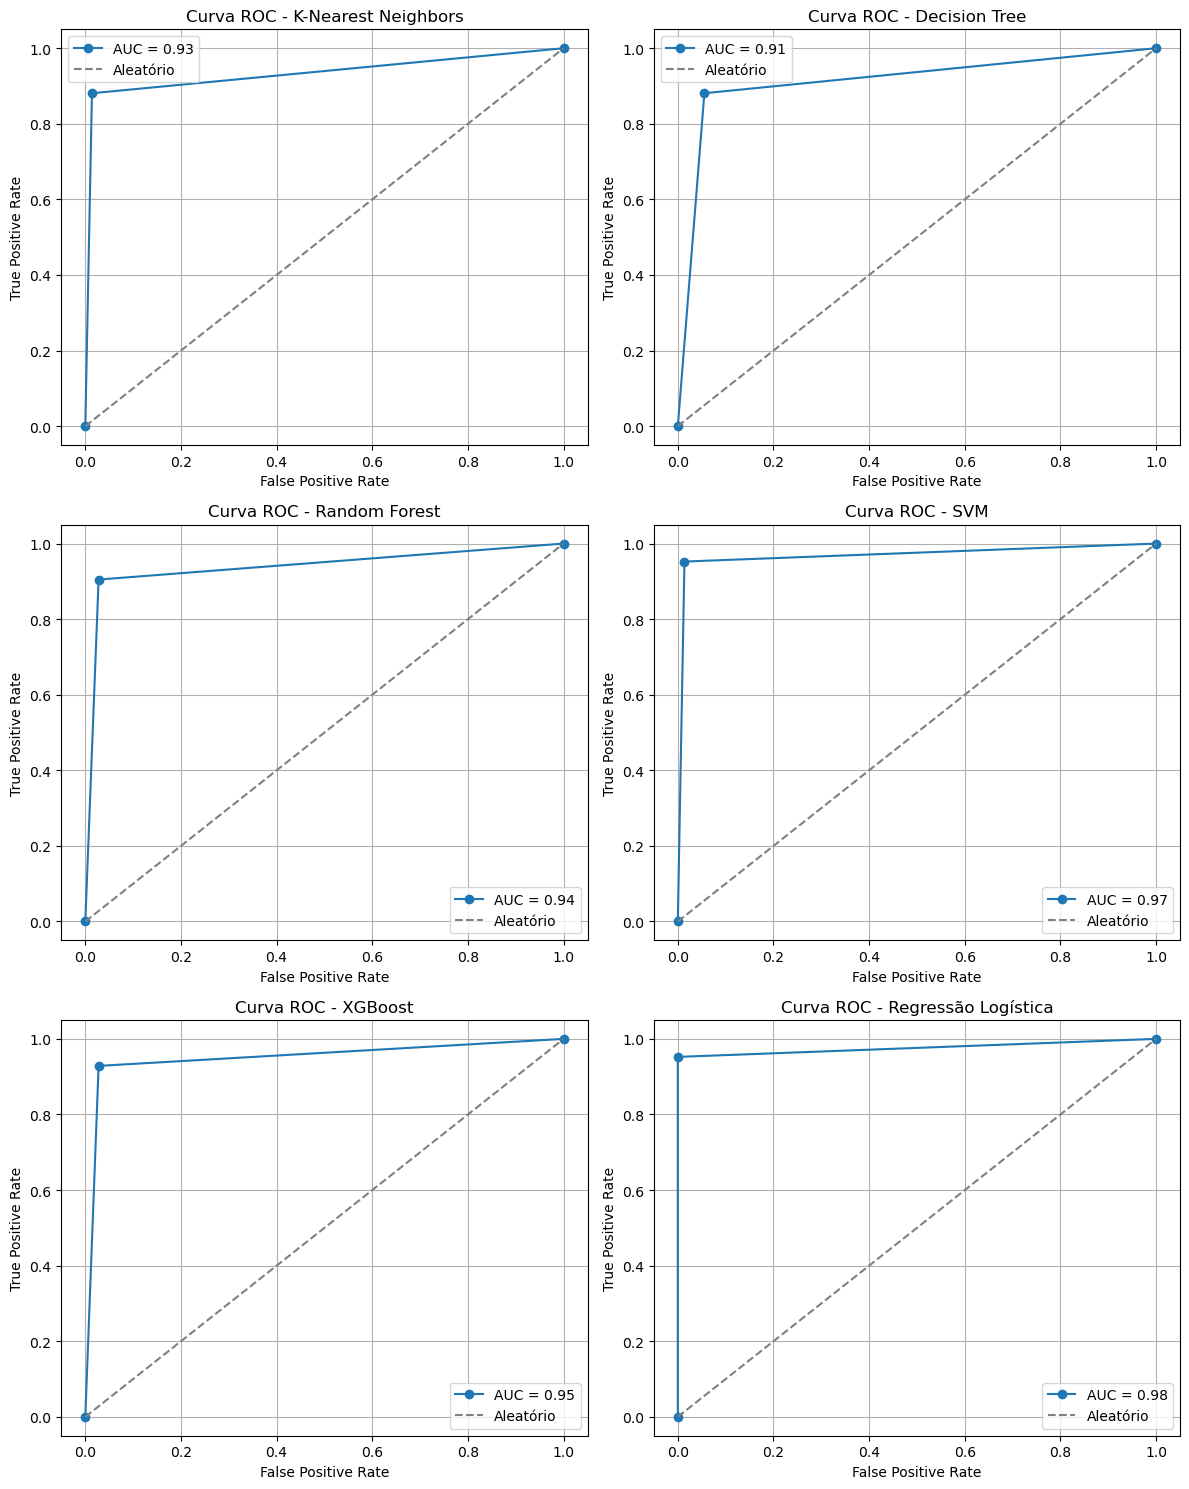

In [36]:
# Configurações de layout
num_graficos = len(metricas_curva_roc)
linhas = (num_graficos + 1) // 2  # Máximo 2 por linha
fig, axs = plt.subplots(linhas, 2, figsize=(12, 5 * linhas))
axs = axs.flatten()  # Facilita o acesso aos subplots

# Plotando cada curva ROC
for i, (nome, fpr, tpr) in enumerate(metricas_curva_roc):
    ax = axs[i]
    auc_valor = auc(fpr, tpr)
    ax.plot(fpr, tpr, marker='o', label=f'AUC = {auc_valor:.2f}')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
    ax.set_title(f'Curva ROC - {nome}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()
    ax.grid(True)

# Remove subplots extras se houver
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

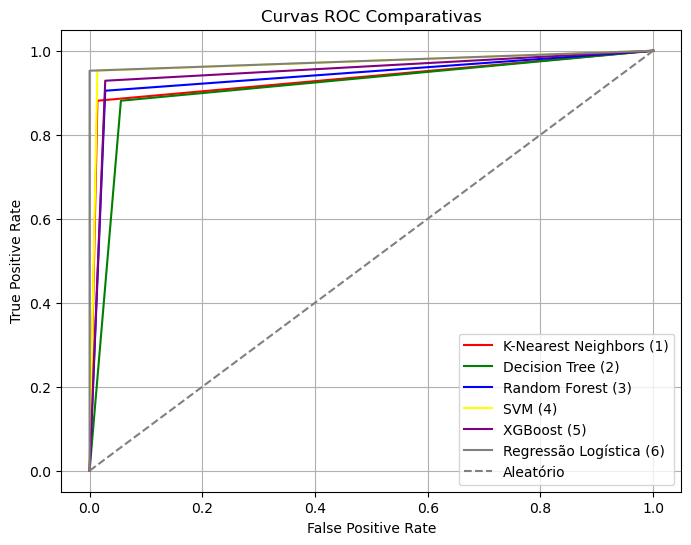

In [37]:
# Cores diferentes para cada modelo
cores = ['red', 'green', 'blue','yellow','purple','gray']

plt.figure(figsize=(8, 6))
for i, (nome, fpr, tpr) in enumerate(metricas_curva_roc):
    plt.plot(fpr, tpr, label=nome + f' ({i+1})', color=cores[i])

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC Comparativas')
plt.legend()
plt.grid(True)
plt.show()

# Explicando as decisões dos modelos com Shap Value

### SHAP = SHapley Additive exPlanations. 

Esse método tem como objetivo explicar a previsão de uma instância/observação calculando a contribuição de cada recurso para a previsão plota um gráfico facilmente interpretável.

In [38]:
df_X_test = pd.DataFrame(data=X_test, columns=attributes[0:num_features])
# recuperando os nomes das colunas do dataset já com PCA aplicado

def explicar_com_shap(modelo, X_test):
    
    # Cria o explicador SHAP com base no tipo de modelo
    explainer = shap.Explainer(modelo, X_test)

    # Calcula os valores SHAP
    shap_values = explainer(X_test)

    # Gera o gráfico de resumo
    shap.summary_plot(shap_values, X_test)

    return shap_values


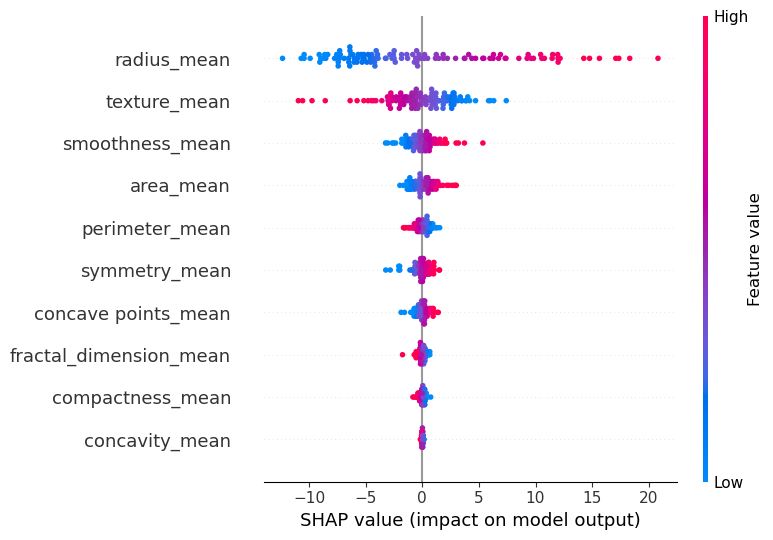

In [39]:
# exemplo com o modelo de Regressão Linear (o que melhor performou)
shap_values = explicar_com_shap(model_rl, df_X_test)

## Como interpretar o gráfico

| Elemento do gráfico | Significado | 
|--------|--------|
|  Eixo Y (variáveis)   |  Lista as variáveis mais importantes, da mais relevante (topo) à menos relevante (base).   |
|  Pontos coloridos   | Cada ponto representa uma amostra do seu conjunto de teste.   |
|  Cor do ponto   |  Indica o valor da variável: vermelho = valor alto, azul = valor baixo.  |
|  Eixo X (valor SHAP)   |  Mostra o impacto da variável na saída do modelo. Valores positivos empurram a previsão para maligno (1), negativos para benigno (0).   |

- radius_mean está no topo → é a variável mais influente.
- Pontos vermelhos (valores altos) estão à direita → valores altos de radius_mean aumentam a chance de ser maligno.
- Pontos azuis (valores baixos) estão à esquerda → valores baixos empurram para benigno.
- Valores altos (vermelhos) tendem a estar à direita → indicam malignidade. Mas não é uma regra.
- fractal_dimension_mean tem impacto menor → aparece mais embaixo e com pontos mais concentrados perto do zero.


### Conclusão: 

- O modelo está aprendendo padrões coerentes com a literatura médica: tumores malignos tendem a ter maior raio, área, perímetro e concavidade.

